# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [67]:
#reading the csv file 
df = pd.read_csv('marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [68]:
#get the info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The data has 26 columns and most of them are numerical

In [69]:
#get the shape of the data
df.shape

(2240, 27)

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [70]:
#checking if there are missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

- There are missing values in the Income column. 
- We can fill it with mean value

In [71]:
#percentage of missing values
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [72]:
#filling the missing value
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

- The missing value is filled with mean value and no there are no missing values in the data.

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [73]:
# check for duplicate data
len(df[df.duplicated()])

0

- There are no duplicate values in the data.

### 5. Drop the columns which you think redundant for the analysis 

In [74]:
# drop the redundant columns
df = df.drop(columns=['ID','Dt_Customer'],axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [75]:
#Before replacing, check the unique values in the Marital_Status column
print(df['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [76]:
#Replace [Together,Married] as Relationship
df['Marital_Status'] = df['Marital_Status'].replace(['Together','Married'],'Relationship')

#Replace [Divorced,Widow,Alone,YOLO,Absurd] as Single
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced','Widow','Alone','YOLO','Absurd'],'Single')
print(df['Marital_Status'].unique())

['Single' 'Relationship']


- After grouping, now there is only two unique values, Single and Relationship

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [77]:
# Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [78]:
# Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'
df['Num_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases'] + df['NumWebVisitsMonth']

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [79]:
#Group the columsn 'Kidhome' and 'Teenhome' as 'Kids'
df['Kids'] = df['Kidhome'] + df['Teenhome']

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [80]:
# Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

### 11. Drop those columns which we have used above for obtaining new features

In [81]:
df=df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumWebVisitsMonth','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases','Kidhome', 'Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,0,1617,32,0,1
1,1954,Graduation,Single,46344.0,38,0,27,11,2,0
2,1965,Graduation,Relationship,71613.0,26,0,776,25,0,0
3,1984,Graduation,Relationship,26646.0,26,0,53,14,1,0
4,1981,PhD,Relationship,58293.0,94,0,422,24,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [82]:
from datetime import datetime
df['Age'] = datetime.now().year - df['Year_Birth']

#drop the Year_Birth Column
df.drop('Year_Birth',axis=1,inplace=True)
df.head(3)

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,0,1617,32,0,1,67
1,Graduation,Single,46344.0,38,0,27,11,2,0,70
2,Graduation,Relationship,71613.0,26,0,776,25,0,0,59


### 13. Encode the categorical variables in the dataset

In [85]:
#Encoding
categorical_data = ['Education','Marital_Status']
lbl = LabelEncoder()
for i in categorical_data:
    df[i] = lbl.fit_transform(df[i])
df.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,1,58138.0,58,0,1617,32,0,1,67
1,2,1,46344.0,38,0,27,11,2,0,70
2,2,0,71613.0,26,0,776,25,0,0,59
3,2,0,26646.0,26,0,53,14,1,0,40
4,4,0,58293.0,94,0,422,24,1,0,43


### 14. Standardize the columns, so that values are in a particular range

In [88]:
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
scaled_features_df.head(3)

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,1.346874,0.235327,0.307039,-0.097282,1.679417,1.621229,-1.264505,0.621248,0.985345
1,-0.350141,1.346874,-0.235826,-0.383664,-0.097282,-0.961275,-1.258779,1.396361,-0.501912,1.235733
2,-0.350141,-0.742460,0.773633,-0.798086,-0.097282,0.282673,0.661226,-1.264505,-0.501912,0.317643


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [89]:
#Generate the Covariance matrix
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663,  0.01375403,  0.1200273 , -0.01173369, -0.05056252,
         0.09209518,  0.08559678,  0.05321304,  0.06327892,  0.17146685],
       [ 0.01375403,  1.00044663, -0.00463847,  0.00450972,  0.00520466,
         0.01775232, -0.00820874, -0.03917598,  0.06004206,  0.0042384 ],
       [ 0.1200273 , -0.00463847,  1.00044663, -0.00394826, -0.02723528,
         0.66500337,  0.41026768, -0.29084155,  0.28717443,  0.16101378],
       [-0.01173369,  0.00450972, -0.00394826,  1.00044663,  0.01323699,
         0.02044173, -0.00109311,  0.01806145, -0.08900203,  0.01987996],
       [-0.05056252,  0.00520466, -0.02723528,  0.01323699,  1.00044663,
        -0.03707503, -0.01509537,  0.03108014, -0.01761676,  0.030141  ],
       [ 0.09209518,  0.01775232,  0.66500337,  0.02044173, -0.03707503,
         1.00044663,  0.62743227, -0.49911047,  0.4564099 ,  0.11135611],
       [ 0.08559678, -0.00820874,  0.41026768, -0.00109311, -0.01509537,
         0.62743227,  1.00044663, -0.11956285

In [90]:
#Calcuate the eigen values and eigen vectors
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print('eig_values:','/n',eig_values)
print('eig_vectors:','/n',eig_vectors)

eig_values: /n [2.64622971 0.18559486 1.2641465  0.5339102  0.7081253  0.76687577
 0.84016896 1.04669743 0.99778718 1.01493037]
eig_vectors: /n [[-0.10471824 -0.00977412  0.53371852 -0.08873642  0.24576825 -0.06764837
  -0.69316373  0.36997733 -0.11042609 -0.04095728]
 [-0.02472934  0.00226694 -0.07977586  0.03677055  0.13135904 -0.07612488
   0.22819113  0.23806391 -0.37272955 -0.84908417]
 [-0.47723659 -0.30915122  0.0962713   0.78640727  0.17703543  0.07669606
   0.06214253 -0.07214149  0.00969166  0.05081695]
 [ 0.01702097 -0.04520998  0.11558286 -0.00369862 -0.20655179 -0.06532555
  -0.23887389 -0.68014523 -0.6462383  -0.00894434]
 [ 0.03606307  0.00597622  0.02722779  0.00321056  0.09504169 -0.04080531
  -0.29330769 -0.51283056  0.63401285 -0.48602182]
 [-0.57024078  0.80874722 -0.04633784 -0.0493107   0.07660124 -0.02357708
   0.02999181 -0.08729248 -0.02130335  0.02788729]
 [-0.42542209 -0.37837713  0.17886339 -0.46512471  0.20128983 -0.51721933
   0.30783424 -0.12651035  0.056

In [92]:
#Calculate explained variance and cumulative variance
total = sum(eig_values)
var_exp = [(i/total)*100 for i in sorted(eig_values,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)


Explained Variance:  [26.450483608287968, 12.635821459633476, 10.462301505225701, 10.144772768299289, 9.973417414692289, 8.397938852764828, 7.665334183889922, 7.078091691067821, 5.336718452475856, 1.8551200636628498]
Cummulative Variance Explained:  [ 26.45048361  39.08630507  49.54860657  59.69337934  69.66679676
  78.06473561  85.73006979  92.80816148  98.14487994 100.        ]


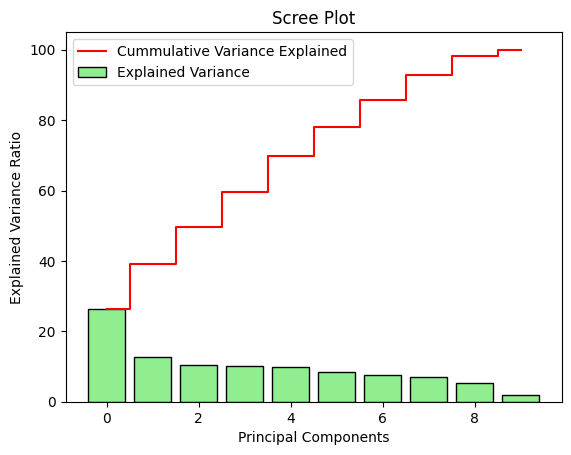

In [93]:
# scree plot
plt.bar(range(10),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(10),cum_var_exp,where='mid',color='red',label='Cummulative Variance Explained')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

- The first 8 principal components are explaining about 95% of the variation. 
- So the optimal prinicipal componenet is 8.

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [94]:
#Using the dimensions obtained from PCA to apply clustering
pca = PCA(n_components=8)
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.510126,-0.068845,0.285803,1.122304,-0.629855,-0.971494,0.253451,0.003915
1,-1.700957,0.968875,-0.635881,1.280586,-0.150977,-1.087501,0.524533,-0.519512
2,1.053319,-0.296847,0.043191,-0.806632,0.672400,-0.510364,0.882981,0.860786
3,-1.752077,-1.122808,-0.499252,-0.780267,0.577291,0.348437,-0.135991,0.333839
4,-0.041870,0.598401,0.770141,-0.839236,-1.038944,1.538344,-0.898026,0.754193


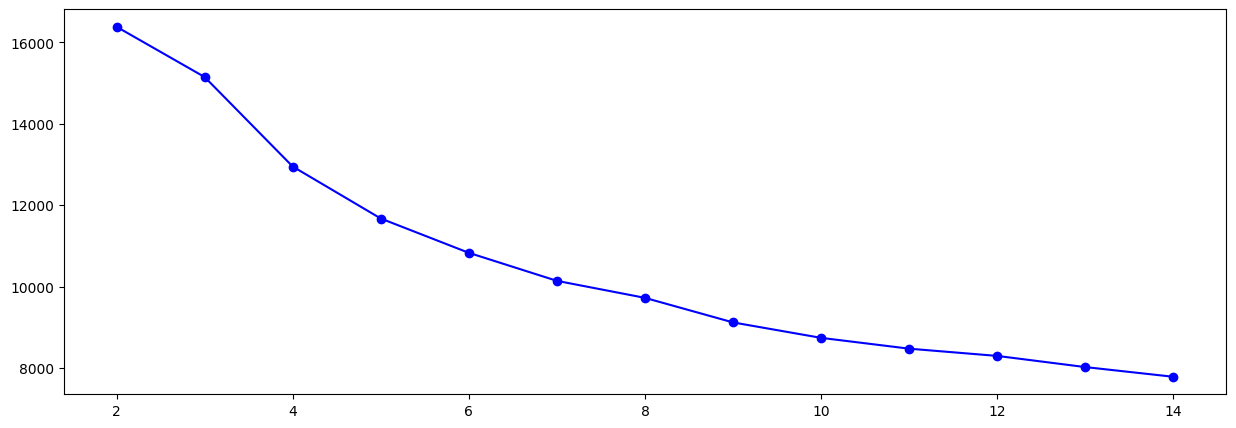

In [96]:
#Kmeans Clustering using PCA transformed data
#finding optimal K value using elbow plot
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

#Creating a df of number of clusters and cluster_errors
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

#Elbow plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()


- At the inertia drastically decreases. 
- Hence optimal clusters at K=3.

In [97]:
#Applying KMeans clustering for the optimal number of clusters obtained.
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [98]:
#creating the df of labels
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [100]:
#joining the label df to the pca_df df
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,2.510126,-0.068845,0.285803,1.122304,-0.629855,-0.971494,0.253451,0.003915,2
1,-1.700957,0.968875,-0.635881,1.280586,-0.150977,-1.087501,0.524533,-0.519512,0
2,1.053319,-0.296847,0.043191,-0.806632,0.672400,-0.510364,0.882981,0.860786,2
3,-1.752077,-1.122808,-0.499252,-0.780267,0.577291,0.348437,-0.135991,0.333839,1
4,-0.041870,0.598401,0.770141,-0.839236,-1.038944,1.538344,-0.898026,0.754193,0


In [101]:
kmeans_df['Label'].value_counts()

Label
2    884
0    691
1    665
Name: count, dtype: int64

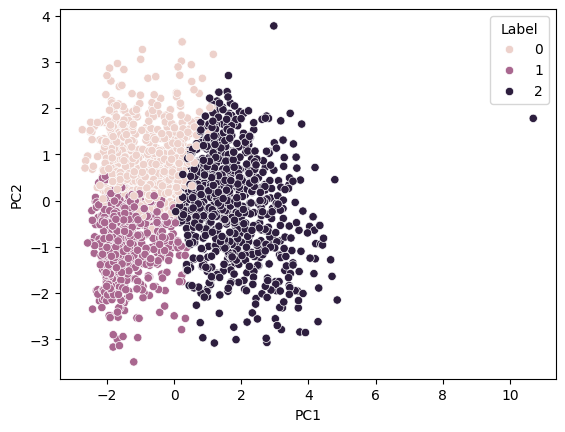

In [118]:
#visualizing the clusters formed using scatter plot
sns.scatterplot(x=kmeans_df['PC1'],y=kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

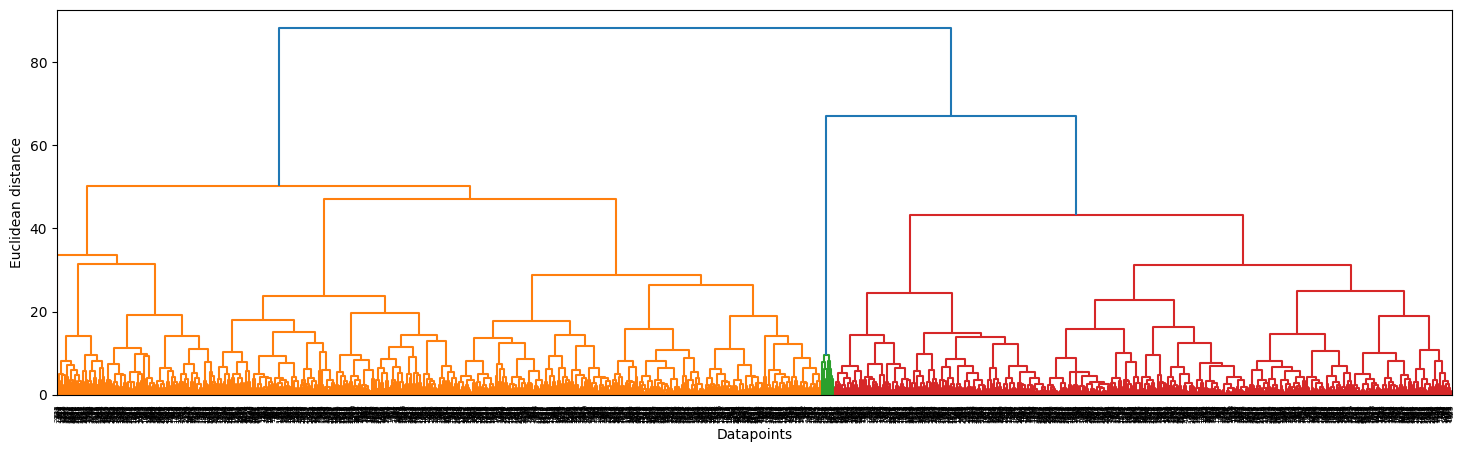

In [119]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [120]:
from sklearn.metrics import silhouette_score

In [121]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))
    


2 0.17658985250593467
3 0.18275264704766017
4 0.15472113641661192
5 0.14877186964120123
6 0.1405209662590079
7 0.1415335315824485
8 0.1358492132185897
9 0.11018438826328573
10 0.10747323517626992
11 0.10713986257093892
12 0.10402849790182783
13 0.1083668698412068
14 0.11231556799386887


- The highest score is for clusters 3
- K=3 is the optimal cluster size 

In [124]:
hie_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [125]:
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head()

,Labels
0,0
1,1
2,0
3,1
4,0


### Visualization and Interpretation of results

-----
## Happy Learning
-----